In [32]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta
from data_analysis.utils import user
from data.paths.parquet_paths import USER, REVIEW

In [33]:
user_df = pd.read_parquet(str(USER))
review_df = pd.read_parquet(str(REVIEW))

In [34]:
user_df = user.prepare_user_df(user_df)

In [35]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   user_id             10000 non-null  object        
 1   name                10000 non-null  object        
 2   review_count        10000 non-null  int32         
 3   yelping_since       10000 non-null  datetime64[ns]
 4   friends             10000 non-null  object        
 5   useful              10000 non-null  int32         
 6   funny               10000 non-null  int32         
 7   cool                10000 non-null  int32         
 8   fans                10000 non-null  int32         
 9   elite               0 non-null      object        
 10  average_stars       10000 non-null  float32       
 11  compliment_hot      10000 non-null  int32         
 12  compliment_more     10000 non-null  int32         
 13  compliment_profile  10000 non-null  int32      

In [36]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   review_id    100000 non-null  object 
 1   user_id      100000 non-null  object 
 2   business_id  100000 non-null  object 
 3   stars        100000 non-null  float32
 4   date         100000 non-null  object 
 5   text         100000 non-null  object 
 6   useful       100000 non-null  int32  
 7   funny        100000 non-null  int32  
 8   cool         100000 non-null  int32  
dtypes: float32(1), int32(3), object(5)
memory usage: 5.3+ MB


In [37]:
# user_df['user_id'] = user_df['user_id'].astype(str)
# review_df['user_id'] = review_df['user_id'].astype(str)

user_columns = [
    'user_id',
    'name',
    'review_count',
    'yelping_since',
    # 'useful',
    # 'funny',
    # 'cool',
    'fans',
    'average_stars'
]


review_user_df = review_df.join(user_df[user_columns].set_index('user_id'), on='user_id')
review_user_df['date'] = pd.to_datetime(review_user_df['date'])

In [38]:
review_user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   review_id      100000 non-null  object        
 1   user_id        100000 non-null  object        
 2   business_id    100000 non-null  object        
 3   stars          100000 non-null  float32       
 4   date           100000 non-null  datetime64[ns]
 5   text           100000 non-null  object        
 6   useful         100000 non-null  int32         
 7   funny          100000 non-null  int32         
 8   cool           100000 non-null  int32         
 9   name           8279 non-null    object        
 10  review_count   8279 non-null    float64       
 11  yelping_since  8279 non-null    datetime64[ns]
 12  fans           8279 non-null    float64       
 13  average_stars  8279 non-null    float32       
dtypes: datetime64[ns](2), float32(2), float64(2), int32(3

In [39]:
review_user_df = review_user_df.loc[~review_user_df['name'].isna()].copy()

In [40]:
review_user_df.sample(2)

,review_id,user_id,business_id,stars,date,text,useful,funny,cool,name,review_count,yelping_since,fans,average_stars
81531,i9mmiHU5pbbsb82apAMMbA,U4INQZOPSUaj8hMjLlZ3KA,rcaPajgKOJC2vo_l3xa42A,5.0,2014-02-08,"Location #3, literally on the strip. Larger c...",5,2,3,Michael,4631.0,2008-01-31 02:55:30,1090.0,3.90
58192,zBBRg0b79j79iMVkdkTrkg,fiGqQ7pIGKyZ9G0RqWLMpg,3nf-a84p8LC41_WAIvJPjg,4.0,2014-02-06,I've been hearing about this place from co-wor...,3,0,1,Margret,1653.0,2010-05-04 16:22:45,68.0,4.03


<AxesSubplot: >

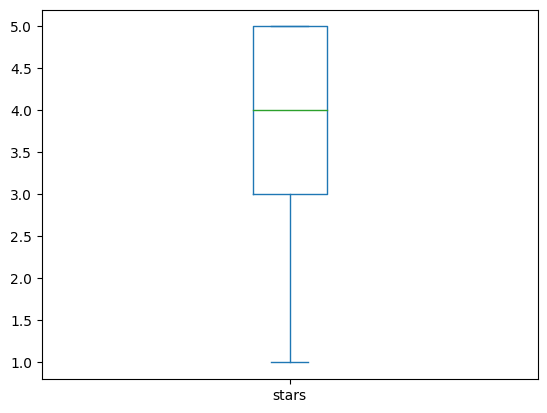

In [41]:
review_user_df.groupby('user_id')['stars'].mean().plot(kind='box')

In [42]:
# early reviews: within month or two after yelping since
youth_threshold = timedelta(days=60)
early_reviews = review_user_df[review_user_df.date - review_user_df.yelping_since < youth_threshold]

early_reviews[['date', 'yelping_since', 'stars', 'user_id']].sample(10)

early_reviews = early_reviews.groupby('user_id').agg(list)
early_reviews.reset_index(inplace=True)
early_reviews['count'] = early_reviews['name'].apply(lambda x: len(x))
early_reviews[early_reviews['count'] >= 3].sample(3)

,user_id,review_id,business_id,stars,date,text,useful,funny,cool,name,review_count,yelping_since,fans,average_stars,count
391,eZL71e58edZJlYkpkpUqig,"[JiH8TqWBTD-JNvJSgrMq6w, iZlCC3m7sF_cP0ngKA20v...","[rcaPajgKOJC2vo_l3xa42A, 91EhRceds781OLo3M4BDr...","[5.0, 4.0, 4.0]","[2008-12-16 00:00:00, 2008-12-10 00:00:00, 200...",[Perfectly prepared French bistro fare in a ch...,"[1, 2, 3]","[0, 0, 3]","[1, 1, 3]","[Heather, Heather, Heather]","[68.0, 68.0, 68.0]","[2008-12-01 04:06:21, 2008-12-01 04:06:21, 200...","[3.0, 3.0, 3.0]","[3.890000104904175, 3.890000104904175, 3.89000...",3
189,JnPIjvC0cmooNDfsa9BmXg,"[l4NMYr-wMvAtn3EuNmC-9Q, GuKs5-KGt5sbTy6np3lir...","[TJt1W9haRm2DKuoZLQ69yA, pfpOi3Q-Yap72z2bLKdWP...","[5.0, 4.0, 3.0]","[2009-03-06 00:00:00, 2009-03-29 00:00:00, 200...",[Every time I return to Montreal (where I live...,"[1, 3, 3]","[0, 0, 2]","[0, 2, 2]","[Kat, Kat, Kat]","[988.0, 988.0, 988.0]","[2009-02-09 16:14:29, 2009-02-09 16:14:29, 200...","[419.0, 419.0, 419.0]","[3.7699999809265137, 3.7699999809265137, 3.769...",3
179,I2K4dZgIyrfvgp63fyjs2A,"[kp51Od44GIgGwRbJsZse6g, th0hTe5_MSC-Ml3bFXL6A...","[Am8d8RT-fZacgs2Qq4jDig, wJK311GrpDS9KSaPdz27h...","[2.0, 3.0, 5.0, 1.0]","[2008-12-15 00:00:00, 2008-12-05 00:00:00, 200...",[I'm not a condoland dweller so I haven't much...,"[0, 1, 1, 3]","[0, 0, 1, 5]","[0, 0, 1, 2]","[Catherine, Catherine, Catherine, Catherine]","[145.0, 145.0, 145.0, 145.0]","[2008-11-12 03:36:12, 2008-11-12 03:36:12, 200...","[6.0, 6.0, 6.0, 6.0]","[3.130000114440918, 3.130000114440918, 3.13000...",4


In [43]:
review_bursts = review_user_df.groupby(['user_id', 'date']).agg(list)
review_bursts.reset_index(inplace=True)
review_bursts['count'] = review_bursts['name'].apply(lambda x: len(x))
review_bursts[review_bursts['count'] >= 3].sample(3)

,user_id,date,review_id,business_id,stars,text,useful,funny,cool,name,review_count,yelping_since,fans,average_stars,count
7025,sYQyXDjGaJj7wfaqz5u8KQ,2007-06-20,"[I9QgNF3DsgZg0xjWsIb9gg, ovHEWB2YCPgOPhw8Pk7GK...","[BxwUDCVbBH0supUQ1wNslw, d47eKkCx3y3N2Eqtzmuc8...","[3.0, 4.0, 5.0]","[If you have the money, or a company card, the...","[6, 4, 7]","[1, 3, 2]","[5, 2, 6]","[Georgia, Georgia, Georgia]","[707.0, 707.0, 707.0]","[2007-01-06 22:04:23, 2007-01-06 22:04:23, 200...","[56.0, 56.0, 56.0]","[3.9800000190734863, 3.9800000190734863, 3.980...",3
6697,q5afJ8gTV5TPEOkzyeJ_WQ,2012-07-18,"[Te6mPCPusEcQcV-aLC2WPA, KXEBwt1f83VzTumD446uZ...","[H8xL4KdQWTIhkoYI6Gv-AA, f4d8cyTwhx-HnsrC1Ws4L...","[1.0, 5.0, 5.0, 5.0]",[I wasn't even going to write a review but the...,"[2, 0, 3, 1]","[11, 0, 0, 0]","[0, 0, 1, 0]","[Kellie, Kellie, Kellie, Kellie]","[262.0, 262.0, 262.0, 262.0]","[2011-03-15 16:00:31, 2011-03-15 16:00:31, 201...","[19.0, 19.0, 19.0, 19.0]","[4.360000133514404, 4.360000133514404, 4.36000...",4
4867,benfF2qIwxDz7TCeF1XWIA,2011-03-23,"[jsPyjDJcX4QwwDuN0asQ0A, dqJdyOJTyVzDMD46ITV2G...","[k7VQD0pbdFN0Ju0yNVrtZQ, 7L7frgS9I4KeTkqPXh7w2...","[2.0, 5.0, 2.0]",[the waitresses are salty.\nthe food is medioc...,"[2, 3, 1]","[1, 0, 1]","[0, 1, 0]","[Tom, Tom, Tom]","[60.0, 60.0, 60.0]","[2011-03-23 00:21:53, 2011-03-23 00:21:53, 201...","[5.0, 5.0, 5.0]","[4.099999904632568, 4.099999904632568, 4.09999...",3


In [44]:
# ~14 years * ~50 weeks
bins_count = 700
review_user_df['date_bin'] = pd.cut(review_user_df['date'], bins=bins_count, labels=range(bins_count))

review_bursts_binned = review_user_df.groupby(['user_id', 'date_bin']).agg(list)
review_bursts_binned.reset_index(inplace=True)
review_bursts_binned = review_bursts_binned.dropna()
review_bursts_binned['count'] = review_bursts_binned['name'].apply(lambda x: len(x))
review_bursts_binned[review_bursts_binned['count'] >= 3].sample(3)

,user_id,date_bin,review_id,business_id,stars,date,text,useful,funny,cool,name,review_count,yelping_since,fans,average_stars,count
1171327,LmPxZshPCXBd4mrERDU8RA,227,"[bTJ1lDkZAD0S1ORJ0iEdFg, tIQYVbKc_kb5zQx0KBO4z...","[B9xUHu7CtjkpMv3549NY8w, NXWWlAJi2kDltKRiSzAk2...","[1.0, 5.0, 5.0]","[2009-08-04 00:00:00, 2009-08-04 00:00:00, 200...",[This is the worst frozen yogurt place I've ev...,"[1, 0, 1]","[0, 0, 1]","[0, 0, 1]","[Chrysty, Chrysty, Chrysty]","[138.0, 138.0, 138.0]","[2009-04-29 17:11:49, 2009-04-29 17:11:49, 200...","[9.0, 9.0, 9.0]","[3.5, 3.5, 3.5]",3
1350616,PKEzKWv_FktMm2mGPjwd0Q,316,"[COA33AbHZyPC6egGAlPgAg, cGgBerrXLXoX_v8VGq4iK...","[wJ-961JWdVhJXhWQf4Jlcw, bpHeCdmCRFAUZqXT2TMdi...","[4.0, 3.0, 4.0]","[2011-04-26 00:00:00, 2011-04-23 00:00:00, 201...",[Nice staff. Fast service. Free drink. What...,"[0, 2, 2]","[0, 0, 0]","[1, 0, 1]","[Norm, Norm, Norm]","[2570.0, 2570.0, 2570.0]","[2008-12-12 02:30:13, 2008-12-12 02:30:13, 200...","[319.0, 319.0, 319.0]","[3.75, 3.75, 3.75]",3
3257279,zT9WFNJXeQZBA-WJMsV4Zw,179,"[8VN3WisdsBJlOcN4N8-85Q, oWBNySC0jZtQcV8ugJd3n...","[0rMFhLzeq3Z2OaJ62MQXlw, 2sslQMFDlzk2yMcRGwSjd...","[4.0, 3.0, 3.0]","[2008-08-25 00:00:00, 2008-08-27 00:00:00, 200...","[A nice Italian restaurant with good food, and...","[2, 1, 2]","[0, 0, 1]","[0, 1, 0]","[Luke, Luke, Luke]","[328.0, 328.0, 328.0]","[2008-08-18 17:54:57, 2008-08-18 17:54:57, 200...","[9.0, 9.0, 9.0]","[3.630000114440918, 3.630000114440918, 3.63000...",3


In [45]:
early_reviewers = set(early_reviews['user_id'])
oneday_burst_reviewers = set(review_bursts['user_id'])
oneweek_burst_reviewers = set(review_bursts_binned['user_id'])

print(f'1d / 1w: {len(oneday_burst_reviewers.intersection(oneweek_burst_reviewers))}')
print(f'early / 1w: {len(early_reviewers.intersection(oneweek_burst_reviewers))}')
print(f'early / 1d: {len(early_reviewers.intersection(oneday_burst_reviewers))}')

1d / 1w: 4692
early / 1w: 558
early / 1d: 558


In [46]:
from data.paths.parquet_paths import BUSINESS
from data_analysis.utils import business

business_df = pd.read_parquet(str(BUSINESS))
business_df = business.prepare_business_df(business_df)
business_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, iBof5Tl8vrKISbi82tFEvQ to 9999
Data columns (total 51 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   name                        10000 non-null  object 
 1   address                     10000 non-null  object 
 2   city                        10000 non-null  object 
 3   state                       10000 non-null  object 
 4   postal_code                 10000 non-null  object 
 5   latitude                    10000 non-null  float32
 6   longitude                   10000 non-null  float32
 7   stars                       10000 non-null  float32
 8   review_count                10000 non-null  float64
 9   is_open                     10000 non-null  float64
 10  categories                  10000 non-null  object 
 11  hours                       7716 non-null   object 
 12  AcceptsInsurance            413 non-null    object 
 13  AgesAllowed     

In [47]:
# Searching for home state
# taking users activity
# grouping by user
# checking for the most visted / visited for longest time

review_place_df = review_user_df[['user_id', 'business_id', 'date']]
review_place_df = review_place_df.join(business_df[['city', 'state', 'latitude', 'longitude']], rsuffix='_business', on='business_id')
review_place_df = review_place_df.dropna()
review_place_df

,user_id,business_id,date,city,state,latitude,longitude
3,zEOuNc4K40aw-GE6y8RgIg,Y6FNieFd5UKhJ3a6FbQhyg,2014-07-28,Gilbert,AZ,33.378639,-111.755966
34,fJezNrc49UX9gONGNJ4YUQ,4gwh0q7JsdzHIm_pdYUlZg,2013-02-22,Scottsdale,AZ,33.539532,-111.924576
82,UYcmGbelzRa0Q6JqzLoguw,Er5XAY2UFGGqBHdqpeCFkA,2013-08-04,Las Vegas,NV,36.010628,-115.174904
87,whqfWVBj4x5EDboIVDOymQ,CsLQLiRoafpJPJSkNX2h5Q,2010-03-13,Charlotte,NC,35.194893,-80.767441
93,Y1ICO26IsN7i_1OVD0Inyw,GHs7grPeyVPwmiVKhhfMvg,2008-05-02,Glendale,AZ,33.534256,-112.261200
...,...,...,...,...,...,...,...
99827,Wmh9vK9LX-sxeuTb6vzM2A,36pB0QVVNZuOLV_UxosbAQ,2018-08-27,Montréal,QC,45.479313,-73.584496
99830,U13tLFucJNz1fNv_Xgdj0g,WCqcYtJ4rUxA4bIzjOfzqg,2013-05-11,Charlotte,NC,35.226147,-80.844231
99856,PYRIiQilTl1rkx83hm8ttA,LHXisknIbUy_XtdEQc7x9w,2014-05-13,Las Vegas,NV,36.060051,-115.164833
99892,SBsQvmEEYJsD6xeRzHxf8Q,aRqxT28Tdz2aDiZ7Vkyejw,2013-06-01,Toronto,ON,43.664177,-79.414963


In [48]:
state_mode = (review_place_df
    .groupby(['user_id'])['state']
    .agg(lambda x: pd.Series.mode(x)[0])
    .reset_index()
    .set_index('user_id'))
city_mode = (review_place_df
    .groupby(['user_id'])['city']
    .agg(lambda x: pd.Series.mode(x)[0])
    .reset_index()
    .set_index('user_id'))

user_home_byvisits = state_mode.join(city_mode, on='user_id')
user_home_byvisits.reset_index()

,user_id,state,city
0,---1lKK3aKOuomHnwAkAow,NV,Las Vegas
1,--RlSfc-QmcHFGHyX6aVjA,NV,Las Vegas
2,-1BrzE0pqO_EVw9SGzHEnw,NV,Las Vegas
3,-6J2VjbeLWAHsyAB8VN7bA,AZ,Glendale
4,-6iqrpnSPBW2plS8y7-cLA,NC,Charlotte
...,...,...,...
2750,zwmw_cNa5DzJotaFOHTvQg,AZ,Scottsdale
2751,zx6gq8IslnAwCyCUztXn1A,AZ,Scottsdale
2752,zy2ImADN9B0cvIRCC3d0Zg,AZ,Gilbert
2753,zyNGr5Tlg1rK1frevXCx2g,AZ,Scottsdale


In [49]:
# How to check by time?
# for each pair of reviews from same state/city count deltas between visits, max delta is homestate, homecity
from itertools import combinations

state_delta = review_place_df.groupby(['user_id', 'state']).apply(lambda x:
    sum(map(lambda dates: abs((dates[1] - dates[0]).days), combinations(x['date'], 2))))
    
state_mode_time = (state_delta.groupby(['user_id', 'state'])
    .max()
    .reset_index()[['user_id', 'state']]
    .drop_duplicates(['user_id'])
    .set_index('user_id'))

city_delta = review_place_df.groupby(['user_id', 'city']).apply(lambda x:
    sum(map(lambda dates: abs((dates[1] - dates[0]).days), combinations(x['date'], 2))))
city_mode_time = (city_delta.groupby(['user_id', 'city'])
    .max()
    .reset_index()[['user_id', 'city']]
    .drop_duplicates(['user_id'])
    .set_index('user_id'))

user_home_bydelta = state_mode_time.join(city_mode_time, on='user_id')
user_home_bydelta.reset_index()

,user_id,state,city
0,---1lKK3aKOuomHnwAkAow,NV,Las Vegas
1,--RlSfc-QmcHFGHyX6aVjA,NV,Las Vegas
2,-1BrzE0pqO_EVw9SGzHEnw,NV,Las Vegas
3,-6J2VjbeLWAHsyAB8VN7bA,AZ,Glendale
4,-6iqrpnSPBW2plS8y7-cLA,NC,Charlotte
...,...,...,...
2750,zwmw_cNa5DzJotaFOHTvQg,AZ,Scottsdale
2751,zx6gq8IslnAwCyCUztXn1A,AZ,Scottsdale
2752,zy2ImADN9B0cvIRCC3d0Zg,AZ,Gilbert
2753,zyNGr5Tlg1rK1frevXCx2g,AZ,Scottsdale


In [50]:
user_home_byvisits.compare(user_home_bydelta, keep_shape=True).dropna()

state              city           
                        self other        self      other
user_id                                                  
37HswRimgBEf7_US-c3CDA    NV    NC   Las Vegas  Charlotte
CxDOIDnH8gp9KXzpBHJYXw    ON    OH     Markham  Cleveland
U4INQZOPSUaj8hMjLlZ3KA    NV    AZ   Las Vegas  Henderson
hLVq7VSJBHZwqurwWoCmpg    PA    NV  Pittsburgh  Las Vegas

In [51]:
review_user_df = review_user_df.join(business_df[['state', 'city', 'longitude', 'latitude']], on='business_id')
review_user_df['state'].dropna()

3        AZ
34       AZ
82       NV
87       NC
93       AZ
         ..
99827    QC
99830    NC
99856    NV
99892    ON
99944    PA
Name: state, Length: 4023, dtype: object

In [52]:
review_user_df = review_user_df.join(user_home_byvisits['state'], on='user_id', rsuffix='_user')
review_user_df['state_user'].dropna()

3        AZ
34       AZ
36       AZ
66       NV
68       AZ
         ..
99916    AZ
99920    NC
99924    AZ
99935    NV
99944    PA
Name: state_user, Length: 6044, dtype: object

In [53]:
review_user_df['origin'] = review_user_df.apply(lambda x:
    'unknown' if x.state is None or x.state_user is None else 
    'local' if x.state == x.state_user 
    else 'tourist', 
    axis=1)

In [54]:
review_user_df[['review_id', 'business_id', 'origin']].sample(10)

,review_id,business_id,origin
78154,2mkrkPCMcRxZ1HyodYwBRQ,uZuh51lXu7tsrC8RAwkg1A,local
10114,sPfpMApwJRcvPt82jAIJ1g,pP71Ir_U2uKU10f4vwA7tA,tourist
80190,TmGqv7O-PUvhKU_VytWxpQ,68PJJkcq_i0SlLqO6t7Qxw,local
87836,YBG5xsSEcikH8_to8rtnwA,KNNq697tEj_elosGwICm3A,tourist
2782,YfbMQao9KzqCphmlOfukRw,yZnEwqTGpkrj_mga5zeZmQ,local
18695,lqW5vhPyOXWB8HveiWe_vw,X5ktZZOu3lcsb_XaJ-7NtA,tourist
448,e01icWqdDPYl7vxl_qZaRA,jMEGdDfVSSubmFZhFnUfrg,tourist
83573,y21UuV9EV7Ni8e4II2UuNg,DUZrq9-UJWRWPzc6SZ_crg,tourist
35253,hVLczXXvVhNgF80Sk3t4Aw,yBfRIMeEkzbBNlY4SDLQQg,tourist
85412,pmo-tfGmp7FBEZHtdv2TVA,0FUtlsQrJI7LhqDPxLumEw,local


In [55]:
local_reviews = review_user_df[review_user_df['origin'] == 'local'][['business_id', 'stars']]
local_reviews

,business_id,stars
3,Y6FNieFd5UKhJ3a6FbQhyg,4.0
34,4gwh0q7JsdzHIm_pdYUlZg,5.0
82,Er5XAY2UFGGqBHdqpeCFkA,4.0
87,CsLQLiRoafpJPJSkNX2h5Q,3.0
93,GHs7grPeyVPwmiVKhhfMvg,2.0
...,...,...
99827,36pB0QVVNZuOLV_UxosbAQ,5.0
99830,WCqcYtJ4rUxA4bIzjOfzqg,4.0
99856,LHXisknIbUy_XtdEQc7x9w,4.0
99892,aRqxT28Tdz2aDiZ7Vkyejw,4.0


In [56]:
business_df['local_stars'] = business_df.index.to_series().apply(lambda x: 
    local_reviews[local_reviews['business_id'] == x]['stars'].mean())
business_df['local_stars'].sample(10)

Saaa6Jd7NwCvuYhKkB52pg    NaN
6873                      NaN
4492                      NaN
6253                      NaN
3Xb6SkWJyjYcs93XjDzoVw    NaN
l47qiT8uAV5pji_AYsF0Hw    NaN
1466                      NaN
2693                      NaN
oM8GqWtU1_ld7lLnYe3KcA    4.0
Egwnk84ioGxzx6BsJmWkrw    NaN
Name: local_stars, dtype: float64

In [57]:
tourist_reviews = review_user_df[review_user_df['origin'] == 'tourist'][['business_id', 'stars']]
tourist_reviews

,business_id,stars
7,0TBTV3q6QXCn9vNhy3Xi2w,4.0
21,XZbuPXdyA0ZtTu3AzqtQhg,4.0
36,bAZnIuqxB9RHu-Mz_HBeJg,4.0
47,u_vPjx925UPEG9DFOAAvFQ,3.0
66,p0iEUamJVp_QpaheE-Nz_g,4.0
...,...,...
99914,-zbcosKSMGDhaZYN-CrcVA,4.0
99916,_4Gpn_NIM94D9OFucgfaJQ,3.0
99920,oLeNHOEqeuFFgDTprUNXqg,3.0
99924,I6ICIIZfZsp_J9hHmfhWhQ,5.0


In [58]:
business_df['tourist_stars'] = business_df.index.to_series().apply(lambda x: 
    tourist_reviews[tourist_reviews['business_id'] == x]['stars'].mean())
business_df['tourist_stars'].sample(10)

splcXDtI5-UUERmGi2wmNA   NaN
O8QUcrNoRs8H2Pr2P17ljA   NaN
8824                     NaN
8355                     NaN
W1l_hf4j2uvvxA5h1KW6Fw   NaN
5318                     NaN
9bjo4y8LBctvxwyACoR6Ew   NaN
6945                     NaN
aSnofmErjPZUxQOSf-GTiA   NaN
3855                     NaN
Name: tourist_stars, dtype: float64

In [59]:
business_df[['stars', 'local_stars', 'tourist_stars']].dropna().sample(10)

,stars,local_stars,tourist_stars
hvjgF-vnPw2jyL5DBuB0qg,4.0,3.800000,4.0
u-SvRRAfYgpbXZRfQgcTzA,4.0,4.250000,4.0
U9aA5H13y7t9xWnoQslV0Q,2.5,2.863636,2.0
Rb2s2-2kIvbPXnPEuM_OBg,3.0,3.318182,5.0
7EZ4Eu7YJ1ltRCC5jXFJrQ,2.5,2.393939,2.0
Ul6JwluSTm12PVDIqnNaTg,4.0,3.916667,5.0
_G1C1J-syqfRxD0tqTvEuw,4.5,4.000000,5.0
1aVbXH_4uQCTQU7HfGmyow,5.0,4.666667,4.0
Jt28TYWanzKrJYYr0Tf1MQ,3.5,2.736842,3.0
nF5TXLMmC6IJgQxE9CEZPw,3.0,3.500000,4.0


In [60]:
review_user_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8279 entries, 3 to 99944
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   review_id      8279 non-null   object        
 1   user_id        8279 non-null   object        
 2   business_id    8279 non-null   object        
 3   stars          8279 non-null   float32       
 4   date           8279 non-null   datetime64[ns]
 5   text           8279 non-null   object        
 6   useful         8279 non-null   int32         
 7   funny          8279 non-null   int32         
 8   cool           8279 non-null   int32         
 9   name           8279 non-null   object        
 10  review_count   8279 non-null   float64       
 11  yelping_since  8279 non-null   datetime64[ns]
 12  fans           8279 non-null   float64       
 13  average_stars  8279 non-null   float32       
 14  date_bin       8279 non-null   category      
 15  state          4023 